In [1]:
import calour as ca
import calour_utils as cu

failed to load logging config file


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
pwd

'/Users/amnon/git/dbbact-paper/notebooks/dust-israel'

In [4]:
ca.set_log_level(11)

In [5]:
%matplotlib inline

In [6]:
db=ca.database._get_database_class('dbbact')

creating logger


# Load the data
### from:
Gat, Daniella, Yinon Mazar, Eddie Cytryn, and Yinon Rudich.

"Origin-dependent variations in the atmospheric microbiome community in Eastern Mediterranean dust storms."

Environmental science & technology 51, no. 12 (2017): 6709-6718.

https://doi.org/10.1021/acs.est.7b00362

In [7]:
dat=ca.read_amplicon('./all.dust.biom',
                     './map.dust.txt',
                     normalize=10000,min_reads=1000)

2022-07-27 09:49:27 INFO loaded 31 samples, 4222 features
2022-07-27 09:49:27 WARNING Do you forget to normalize your data? It is required before running this function
2022-07-27 09:49:27 INFO After filtering, 31 remain.


In [8]:
datc=dat.cluster_features(10)

2022-07-27 09:49:27 INFO After filtering, 2408 remain.


### Add the name field to make nicer plots

In [9]:
datc.sample_metadata['name']=datc.sample_metadata['type'].copy()
datc.sample_metadata['name'].replace('ambient air','clear',inplace=True)
datc.sample_metadata['name'].replace('sand storm','dust',inplace=True)

# Compare the two dust origin samples

In [10]:
# dd=datc.diff_abundance('type','ambient air','sand storm',random_seed=2022)
dd=datc.diff_abundance('name','clear','dust',random_seed=2022)

2022-07-27 09:49:27 INFO 17 samples with both values
2022-07-27 09:49:27 INFO After filtering, 2303 remain.
2022-07-27 09:49:27 INFO 9 samples with value 1 (['clear'])
2022-07-27 09:49:28 INFO number of higher in clear: 182. number of higher in dust : 418. total 600


2022-07-27 09:49:28 INFO Getting dbBact annotations for 600 sequences, please wait...
2022-07-27 09:49:28 INFO Limited to maximal annotationid: 7440
2022-07-27 09:49:32 INFO got 3524 annotations
2022-07-27 09:49:32 WARNING ignoring 30 annotation with id > max_id 7440
2022-07-27 09:49:32 INFO Got 27623 annotation-sequence pairs
2022-07-27 09:49:32 INFO Added annotation data to experiment. Total 3494 annotations, 600 ASVs
2022-07-27 09:49:32 INFO Found 1 experiments ([206]) matching current experiment - ignoring them.
2022-07-27 09:49:37 INFO found 7 negative
2022-07-27 09:49:45 INFO found 7 positive


/Users/amnon/miniconda3/envs/calour/lib/python3.9/site-packages/matplotlib/backends/backend_agg.py:240: RuntimeWarning: Glyph 13 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/amnon/miniconda3/envs/calour/lib/python3.9/site-packages/matplotlib/backends/backend_agg.py:203: RuntimeWarning: Glyph 13 missing from current font.
  font.set_text(s, 0, flags=flags)


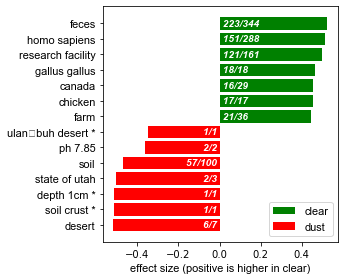

In [11]:
f,e=dd.plot_diff_abundance_enrichment(ignore_exp=True,labels_kwargs={'family':'Arial','size':11},numbers_kwargs={'family':'arial','size':10,'weight':'bold','color':'white','style':'italic'}, max_id=7440,min_appearances=1,num_results_needed=7,max_show=7)
ax=plt.gca()
ax.set_aspect(1.0/ax.get_data_ratio()*1)
ax.figure.tight_layout()


In [12]:
f.figure.savefig('./fig-terms-dust-origin.pdf')

/Users/amnon/miniconda3/envs/calour/lib/python3.9/site-packages/matplotlib/backends/_backend_pdf_ps.py:109: RuntimeWarning: Glyph 13 missing from current font.
  font.set_text(s, 0.0, flags=ft2font.LOAD_NO_HINTING)


In [13]:
e.save('./table-terms-dust-origin')

2022-07-27 09:50:03 INFO Metadata field taxonomy not found. Saving biom table without metadata


2022-07-27 09:50:08 INFO Found 1 experiments ([206]) matching current experiment - ignoring them.
2022-07-27 09:50:08 INFO found 67 annotations with the term ['desert']
2022-07-27 09:50:11 INFO ignored 0 annotations
2022-07-27 09:50:11 WARNING Clipped term circle size to 1000. Real size (number of term seqs not overlapping) should be: 6000


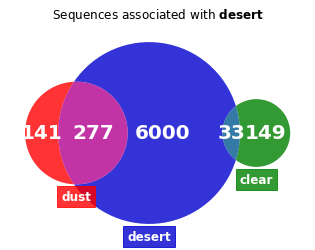

In [14]:
f=db.plot_term_venn_all('desert',dd,max_size=1000, ignore_exp=True,colors_alpha=0.8,label_kwargs={'color':'w','fontweight':'bold','fontsize':20},max_id=7440)

In [15]:
f.savefig('./fig-venn-desert.pdf')

2022-07-27 09:50:15 INFO Found 1 experiments ([206]) matching current experiment - ignoring them.
2022-07-27 09:50:16 INFO found 2067 annotations with the term ['feces']
2022-07-27 09:50:17 INFO annotation 33 is low
2022-07-27 09:50:17 INFO annotation 35 is low
2022-07-27 09:50:18 INFO annotation 97 is low
2022-07-27 09:50:20 INFO annotation 187 is low
2022-07-27 09:50:20 INFO annotation 200 is low
2022-07-27 09:50:21 INFO annotation 554 is low
2022-07-27 09:50:27 INFO annotation 1349 is low
2022-07-27 09:50:37 INFO annotation 2228 is low
2022-07-27 09:50:39 INFO annotation 2358 is low
2022-07-27 09:50:49 INFO annotation 3035 is low
2022-07-27 09:50:49 INFO annotation 3046 is low
2022-07-27 09:50:51 INFO annotation 3265 is low
2022-07-27 09:51:01 INFO annotation 4043 is low
2022-07-27 09:51:01 INFO annotation 4048 is low
2022-07-27 09:51:03 INFO annotation 4183 is low
2022-07-27 09:51:03 INFO annotation 4185 is low
2022-07-27 09:51:03 INFO annotation 4186 is low
2022-07-27 09:51:03 INF

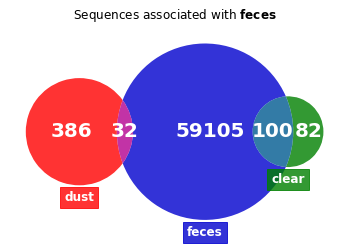

In [16]:
f=db.plot_term_venn_all('feces',dd,max_size=1000, ignore_exp=True,colors_alpha=0.8,label_kwargs={'color':'w','fontweight':'bold','fontsize':20},max_id=7440)

In [17]:
f.savefig('./fig-venn-feces.pdf')

2022-07-27 09:51:46 INFO Found 1 experiments ([206]) matching current experiment - ignoring them.
2022-07-27 09:51:47 INFO found 1760 annotations with the term ['homo sapiens']
2022-07-27 09:53:00 INFO ignored 42 annotations
2022-07-27 09:53:00 WARNING Clipped term circle size to 1000. Real size (number of term seqs not overlapping) should be: 17504


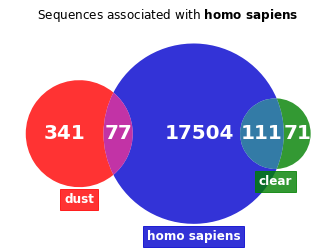

In [18]:
f=db.plot_term_venn_all('homo sapiens',dd,max_size=1000, ignore_exp=True,colors_alpha=0.8,label_kwargs={'color':'w','fontweight':'bold','fontsize':20},max_id=7440)

In [19]:
f.savefig('./fig-venn-homo-sapiens.pdf')